#  Exploratory Data Analysis 
## All Space Missions from 1957

----

#### Dataset source : Kaggle (https://www.kaggle.com/agirlcoding/all-space-missions-from-1957/)

#####  Importing dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Set plotting parameters
plt.rcParams['figure.figsize'] = (12,8)

#####  Importing the dataset

In [3]:
df = pd.read_csv('Space_Corrected.csv')

##### Previewing the data

In [4]:
print(df.shape)
print(df.info())
df.head()

(4324, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB
None


,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


This dataset contains information about 4324 Space Missions 

#### Preliminary Processing

In [5]:
# Extracting Country from location
df['country'] = df['Location'].str.split(",").str[-1]
df.head(3)

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA


In [6]:
# Extracting Year from Datum
df['year'] = df['Datum'].str.split(",").str[-1].str[:5]
df.head(3)

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,country,year
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,2020
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020


### Data Visualization

#### Mission Outcome

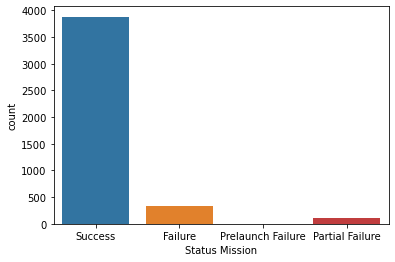

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(df['Status Mission'])

###### Mission Status Statistics

In [8]:
cnt = df['Status Mission'].value_counts()
percent = df['Status Mission'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
pd.DataFrame({'Frequency':cnt,'Percentage':percent})

,Frequency,Percentage
Success,3879,89.71%
Failure,339,7.84%
Partial Failure,102,2.36%
Prelaunch Failure,4,0.09%


#### Year-wise Analysis
----

##### No of Launches per year

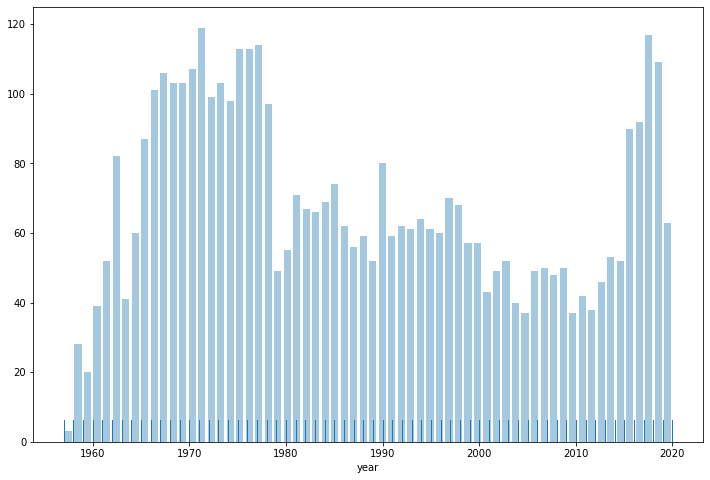

In [9]:
sns.distplot(df.year,kde=False,rug=True,bins=64,hist_kws={"rwidth":0.75})

##### Mission Status per year

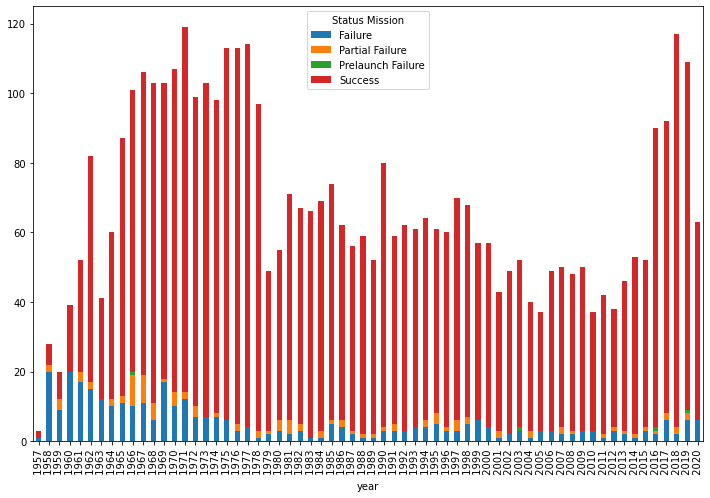

In [10]:
status_df = df.groupby(['year','Status Mission'])['year'].count().unstack('Status Mission').fillna(0)
status_df.plot(kind='bar',stacked=True)

##### Success and Failure Rate 

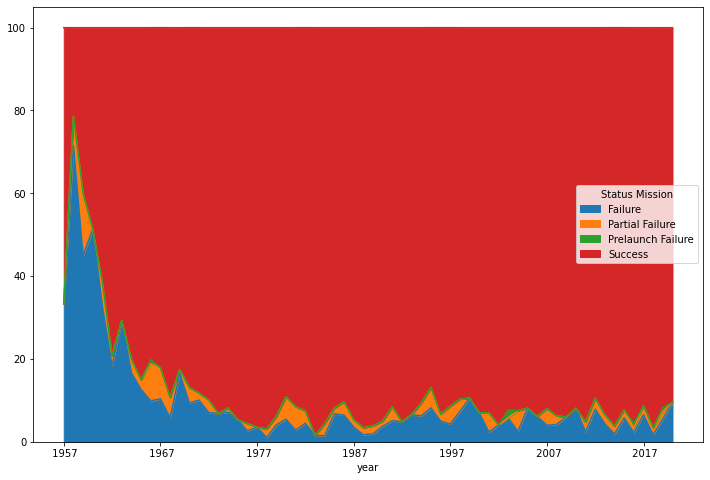

In [11]:
status_tot = status_df.sum(axis=1)
status_df = status_df.loc[:].div(status_tot,axis=0).mul(100).round(2)
status_df.plot(kind='area',stacked=True)

### Missions by Launch Location

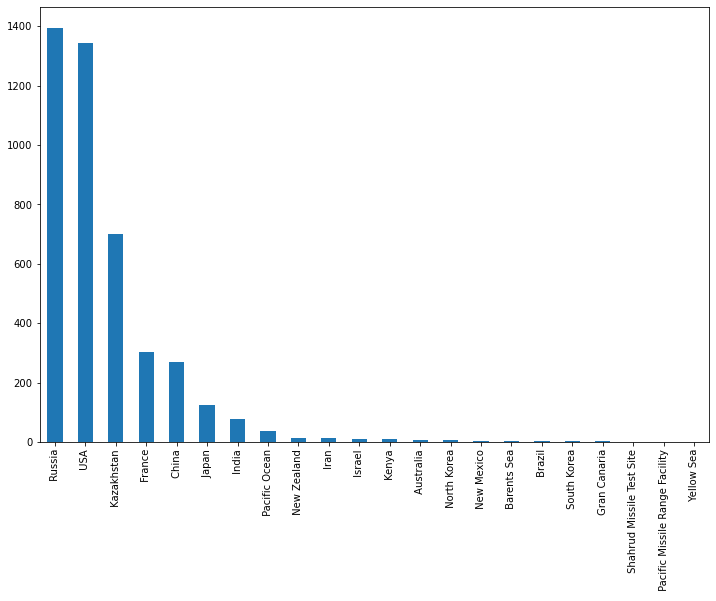

In [12]:
df.country.value_counts().plot(kind='bar')

#### No of Launches per year by top countries

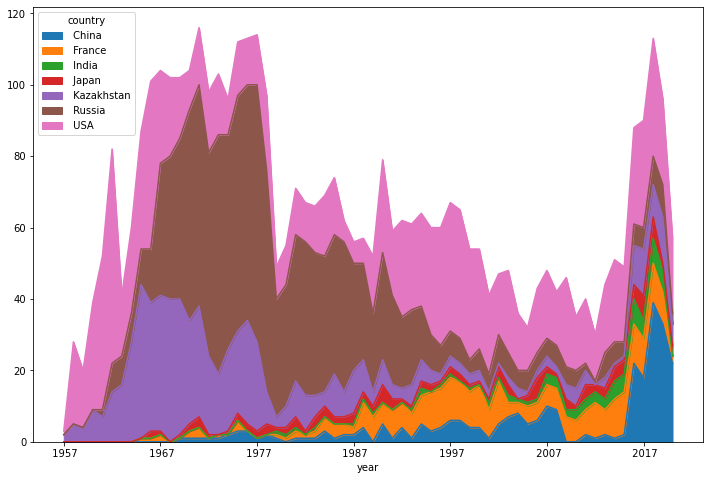

In [13]:
tmp = df.groupby(['country']).count()['year'].nlargest(7)
country_df = df[df['country'].isin(tmp.index)]
country_df = country_df.groupby(['year','country'])['year'].count().unstack('country').fillna(0)
country_df.plot(kind='area',stacked=True)

####  Launch Stats

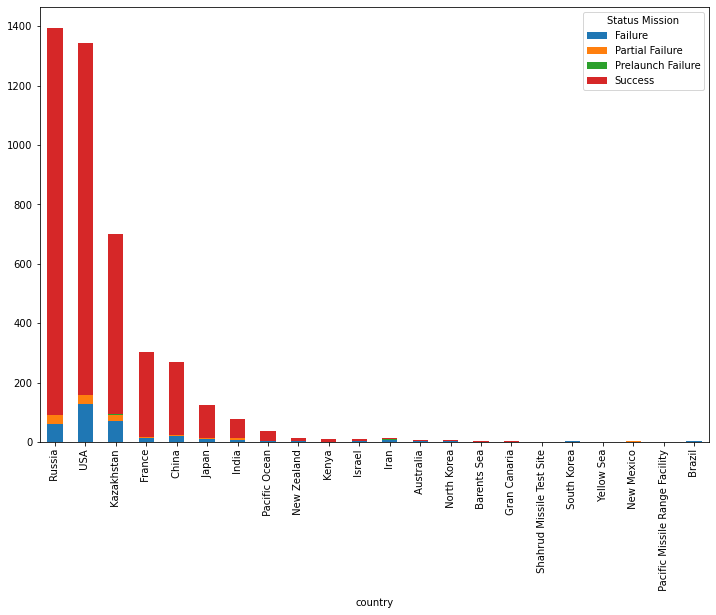

In [14]:
status_df = df.groupby(['country','Status Mission'])['country'].count().unstack('Status Mission').fillna(0)
status_df = status_df.sort_values('Success',ascending=False)
status_df.plot(kind='bar',stacked=True)

####  Relative Success and Failure

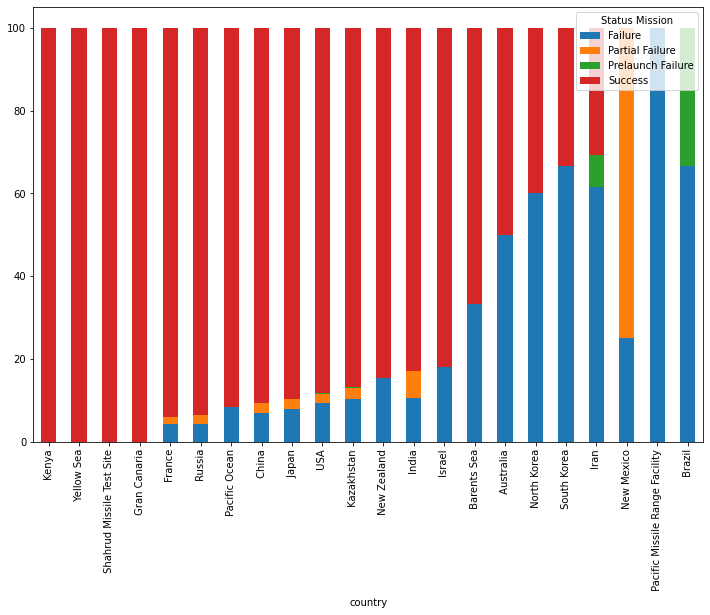

In [15]:
status_tot = status_df.sum(axis=1)
status_df = status_df.loc[:].div(status_tot,axis=0).mul(100).round(2)
status_df = status_df.sort_values('Success',ascending=False)
status_df.plot(kind='bar',stacked=True)

### Lauch by Space Companies

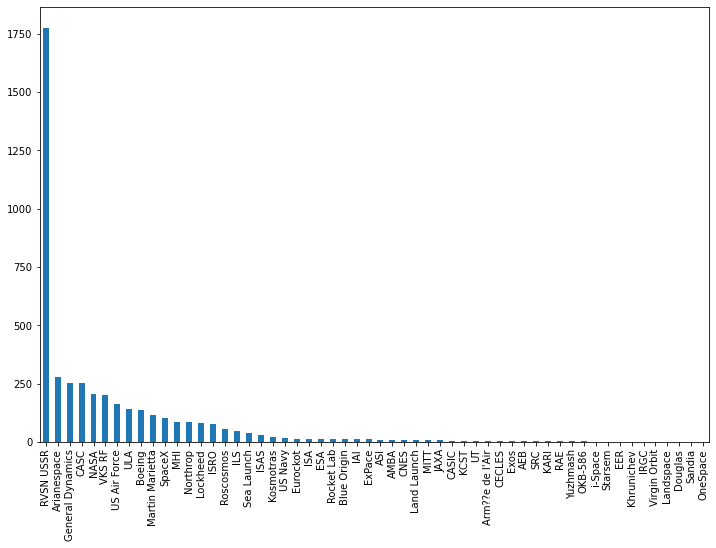

In [16]:
df['Company Name'].value_counts().plot(kind='bar')

#### Mission Success Rate for top 20 Companies

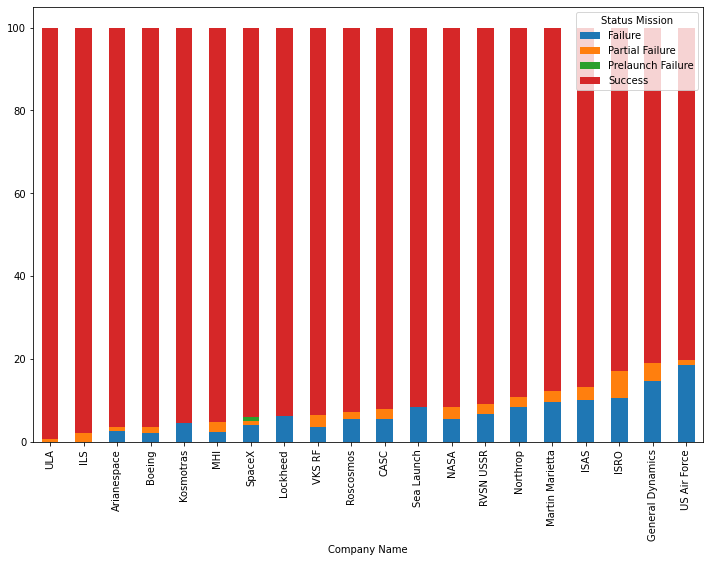

In [17]:
status_df = df.groupby(['Company Name','Status Mission'])['Company Name'].count().unstack('Status Mission').fillna(0)
status_tot = status_df.sum(axis=1)
status_df = status_df.loc[status_tot.nlargest(20).index]
status_tot = status_df.sum(axis=1)
status_df = status_df.loc[:].div(status_tot,axis=0).mul(100).round(2)
status_df = status_df.sort_values('Success',ascending=False)
status_df.plot(kind='bar',stacked=True)